## Dealing with unclean data

Typically, data to be analyzed in real world applications is not fully clean. Frequently, there are missing fields, invalid values, etc.


A civil engineer is working in the design of a bridge, trying to find different alternatives, each of them having a total bridge weight and the degree of deformation in certain parts (e.g., see http://ebesjmetal.sourceforge.net/problems.html). After using an optimization software, she/he has obtained a .txt file (attached to this task) with a number of rows indicating different trade-off designs. A plot of this file should look like like this graph:



PlotBridge.PNG


Unfortunately, some lines/fields have invalid values (blank lines, missing values, characters instead of numbers, etc), and there are also repeteated lines.


This task consists in developing a Jupyter notebook with PySpark to read the file, remove all the invalid lines and remove those that are appears more than one time, and plot the clean data.

In [1]:
# Import requiered libraries

from pyspark.sql import SparkSession
from pyspark.sql.types import *

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
# Set spark session

spark_session = SparkSession.builder \
          .getOrCreate()

In [5]:
# Create struct schema and load data

schema = StructType([StructField("Weight", DoubleType(),False), \
                        StructField("Deformation", DoubleType(), False)])

dataset = spark_session.read.csv(
        path="/home/master/Descargas/bridge.csv",
        sep=",",
        header=True,
        schema=schema)

In [6]:
dataset.show(25)

+-------------------+-------------------+
|             Weight|        Deformation|
+-------------------+-------------------+
| 0.1600004095193499|  0.599999565925713|
| 0.7999996334783612|  0.105573019041743|
| 0.3474026835213373|0.41059125458931517|
| 0.3409188533102768| 0.4161174319177898|
|0.33448446398543363| 0.4216536843155324|
|   0.35390522300019| 0.4051006617019322|
| 0.3280925245214544|0.42720638686411727|
| 0.3217358217215534|0.43278238841939665|
|0.36039794488768706| 0.3996684723945372|
| 0.3154172733712044| 0.4383797783455403|
| 0.3669234753668437| 0.3942579191642874|
|0.37345638999357544| 0.3888892255982278|
| 0.3091488764126171|0.44398842406579203|
| 0.3800121516706126|0.38354874656944227|
|0.30295098086750766|0.44959017652156535|
| 0.2967605824612727|               null|
|0.38657333470529276| 0.3782497818184258|
|0.29063517731969263| 0.4608941011769619|
|0.28454896813201636|0.46656868557912423|
|0.39313313091886176| 0.3729967066807797|
|0.27851604294199267| 0.4722538129

In [7]:
# Remove null values 
dataset_without_null =dataset.na.drop('any')
dataset_without_null.show(25)

+-------------------+-------------------+
|             Weight|        Deformation|
+-------------------+-------------------+
| 0.1600004095193499|  0.599999565925713|
| 0.7999996334783612|  0.105573019041743|
| 0.3474026835213373|0.41059125458931517|
| 0.3409188533102768| 0.4161174319177898|
|0.33448446398543363| 0.4216536843155324|
|   0.35390522300019| 0.4051006617019322|
| 0.3280925245214544|0.42720638686411727|
| 0.3217358217215534|0.43278238841939665|
|0.36039794488768706| 0.3996684723945372|
| 0.3154172733712044| 0.4383797783455403|
| 0.3669234753668437| 0.3942579191642874|
|0.37345638999357544| 0.3888892255982278|
| 0.3091488764126171|0.44398842406579203|
| 0.3800121516706126|0.38354874656944227|
|0.30295098086750766|0.44959017652156535|
|0.38657333470529276| 0.3782497818184258|
|0.29063517731969263| 0.4608941011769619|
|0.28454896813201636|0.46656868557912423|
|0.39313313091886176| 0.3729967066807797|
|0.27851604294199267| 0.4722538129822601|
|0.40628079773284537| 0.3625984029

In [8]:
# Remove duplicates values 
dataset_clean = dataset_without_null.drop_duplicates()
dataset_clean.show(25)

+-------------------+-------------------+
|             Weight|        Deformation|
+-------------------+-------------------+
|0.33448446398543363| 0.4216536843155324|
|  0.572968945115894|0.24305287848265267|
| 0.6348644998867188| 0.2032161525475955|
|0.18971116938088003| 0.5644415504920198|
| 0.7185978141827077|0.15229851636479771|
| 0.7043645514037609|0.16073571880342452|
| 0.6279429618162687|0.20757148355483204|
| 0.3091488764126171|0.44398842406579203|
|  0.525790747174963| 0.2748857010542112|
|0.40628079773284537| 0.3625984029187178|
|0.24925016280479606| 0.5007504192441555|
| 0.6486854221627268| 0.1945899156919917|
| 0.5661846565085659| 0.2475475719299154|
| 0.4326541976345938| 0.3422354548598913|
| 0.2105619652240353| 0.5411296943302976|
| 0.7848970329348788|0.11405585364696387|
| 0.3669234753668437| 0.3942579191642874|
|0.27851604294199267| 0.4722538129822601|
|  0.492385620193628| 0.2982980591482772|
| 0.5934590765189613|0.22963704914396238|
| 0.3409188533102768| 0.4161174319

In [9]:
# Convert to df to plot
dataframe = dataset_clean.toPandas()

In [10]:
# Take axis

x = dataframe["Weight"]
y=dataframe["Deformation"]

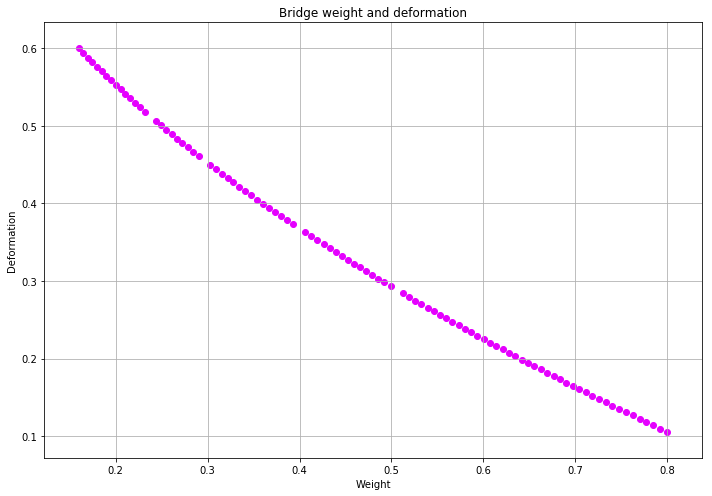

In [11]:
# Plot graph

fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(x, y,marker='o',c="#e500ff" )
ax.set_title('Bridge weight and deformation')    
ax.set_xlabel('Weight')
ax.set_ylabel('Deformation')

ax.grid()
plt.tight_layout()

plt.show()